In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1656,ham,Yes I posted a couple of pics on fb. There's s...,NaN,NaN,NaN
4082,ham,"Good afternoon, my love. It was good to see yo...",NaN,NaN,NaN
2542,ham,Aiyo please Ì_ got time meh.,NaN,NaN,NaN
4832,spam,"New Mobiles from 2004, MUST GO! Txt: NOKIA to ...",NaN,NaN,NaN
2458,ham,"Cool, I'll text you when I'm on the way",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1 Data cleaning
#2 EDA
#3 Text Preprocessing
#4 Model Building
#5 Evaluation
#6 Improvement
#7 Website
#8 Deploy

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [8]:
df.sample(5)

,v1,v2
1692,ham,Weightloss! No more girl friends. Make loads o...
3976,spam,Great NEW Offer - DOUBLE Mins & DOUBLE Txt on ...
558,ham,Hi Princess! Thank you for the pics. You are v...
4084,spam,Orange brings you ringtones from all time Char...
1840,ham,Yeah. I got a list with only u and Joanna if I...


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
436,ham,"Ask g or iouri, I've told the story like ten t..."
3912,ham,Yeah whatever lol
2828,spam,Send a logo 2 ur lover - 2 names joined by a h...
2594,ham,"ThatÛ÷s the thing with apes, u can fight to t..."
1281,ham,Am I the only one who doesn't stalk profiles?


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(403)

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

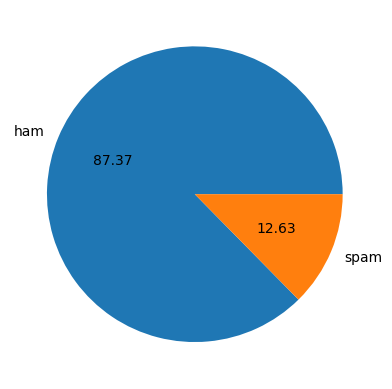

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Akansha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters'] = df['text'].apply(len)

In [30]:
df.head()

,target,text,num_charaters,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111,111
1,0,Ok lar... Joking wif u oni...,29,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,155
3,0,U dun say so early hor... U c already then say...,49,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,61


In [24]:
import nltk
print(nltk.data.path)

['C:\\Users\\Akansha/nltk_data', 'c:\\Users\\Akansha\\AppData\\Local\\Programs\\Python\\Python313\\nltk_data', 'c:\\Users\\Akansha\\AppData\\Local\\Programs\\Python\\Python313\\share\\nltk_data', 'c:\\Users\\Akansha\\AppData\\Local\\Programs\\Python\\Python313\\lib\\nltk_data', 'C:\\Users\\Akansha\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [25]:
import numpy as np
import pandas as pd

In [30]:
import nltk
import os

nltk_path = r"C:\Users\Akansha\AppData\Roaming\nltk_data"
nltk.data.path.append(nltk_path)

# Download both punkt and punkt_tab
nltk.download('punkt', download_dir=nltk_path)
nltk.download('punkt_tab', download_dir=nltk_path)

# Now tokenize
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akansha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Akansha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [32]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [33]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

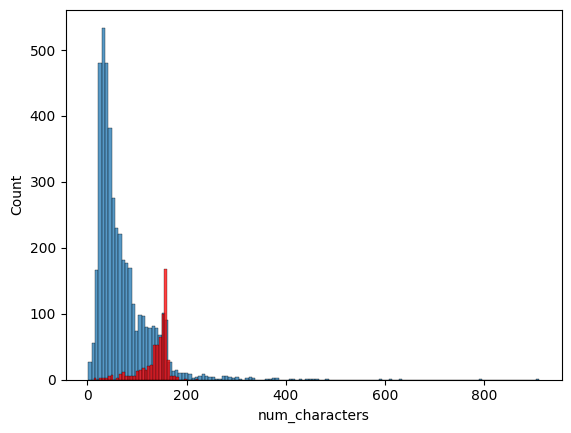

In [42]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

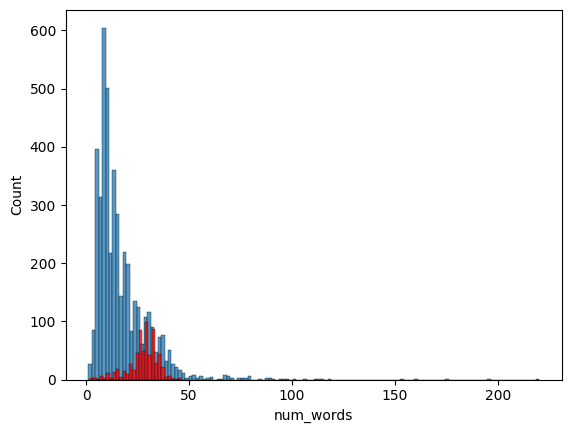

In [43]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

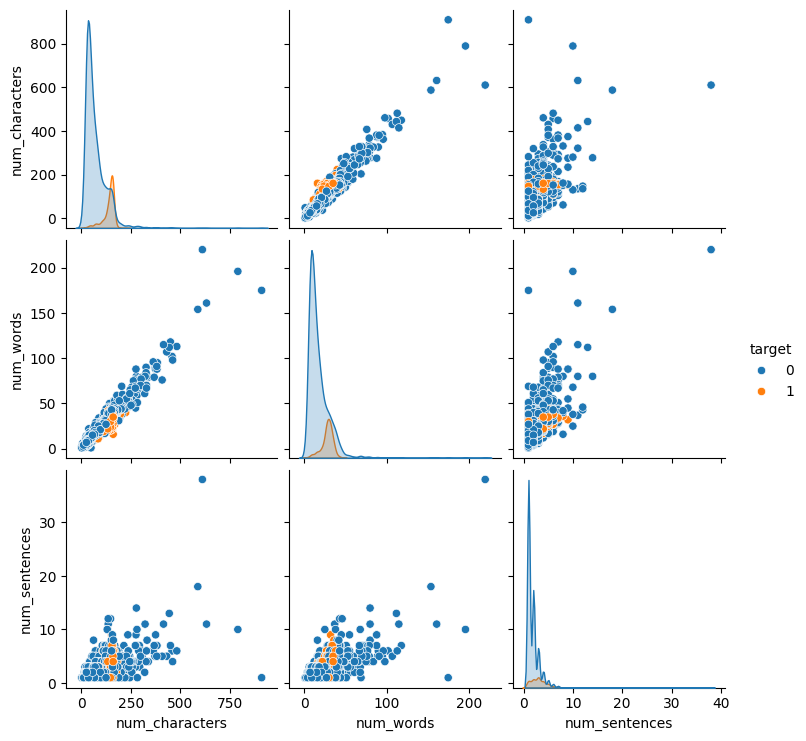

In [44]:
sns.pairplot(df,hue='target')

<Axes: >

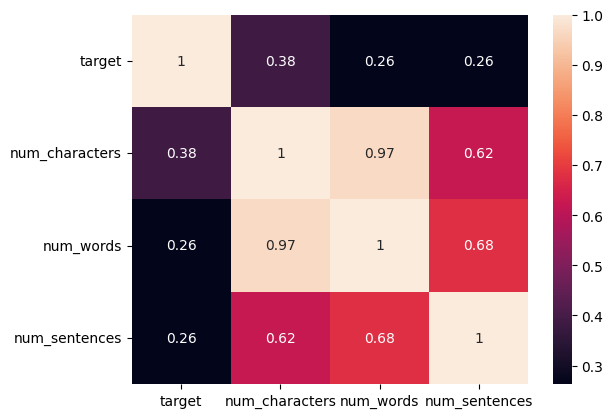

In [50]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True)


In [77]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

# Download necessary resources once
nltk.download('stopwords')
nltk.download('punkt')  # for word_tokenize

ps = PorterStemmer()

def transform_text(text):
    # Lowercasing
    text = text.lower()

    # Tokenization
    text = nltk.word_tokenize(text)

    # Removing non-alphanumeric tokens
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    # Removing stopwords and punctuations
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    # Stemming
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akansha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Akansha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
df['transformed_text'] = df['text'].apply(transform_text)


In [79]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [108]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [109]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

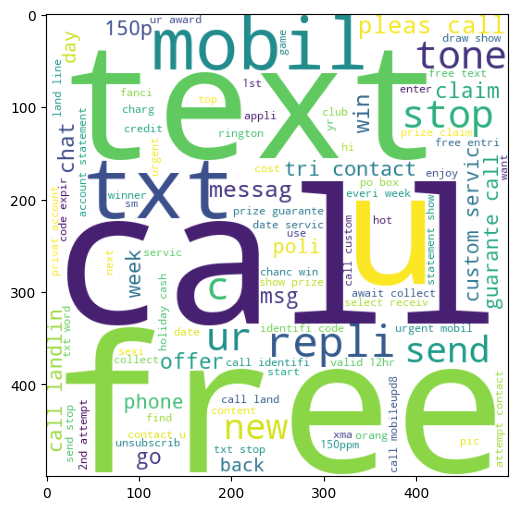

In [110]:
plt.figure(figsize =(15,6) )
plt.imshow(spam_wc)

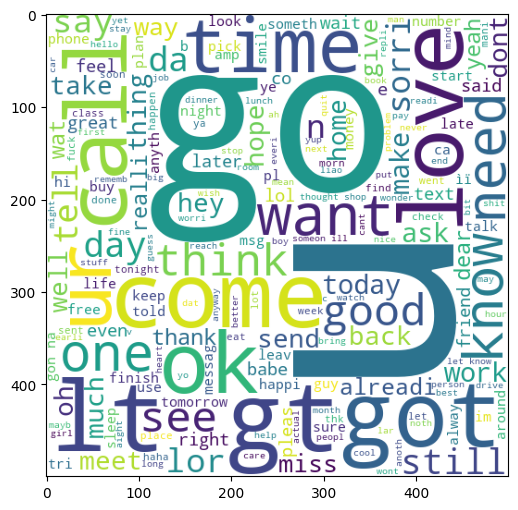

In [112]:
plt.figure(figsize =(15,6) )
plt.imshow(ham_wc)

In [113]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [115]:

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [116]:
len(spam_corpus)

9939

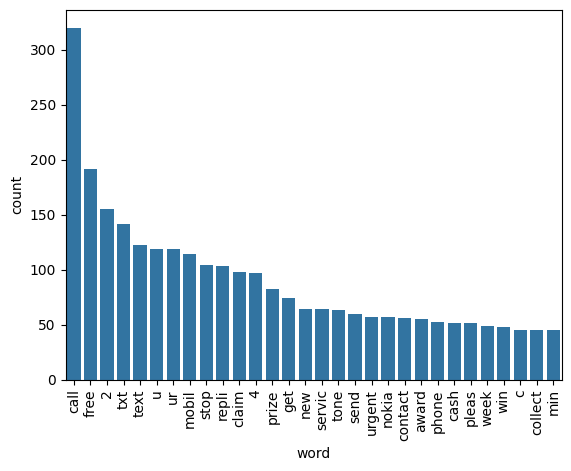

In [126]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a single DataFrame from the Counter output
df_spam_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Now, use the single DataFrame and specify the columns for the plot
sns.barplot(x='word', y='count', data=df_spam_words)
plt.xticks(rotation='vertical')
plt.show()


In [127]:

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [128]:
len(ham_corpus)

35404

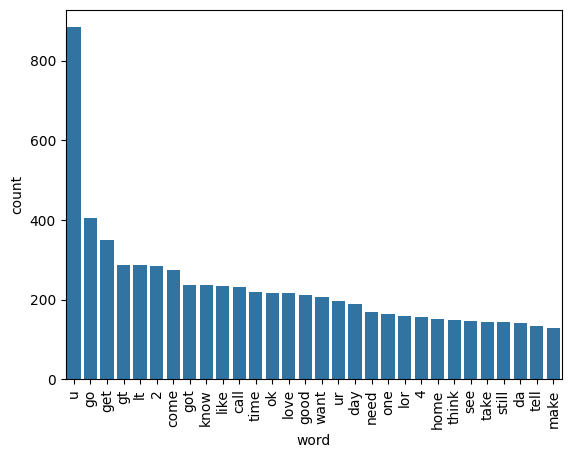

In [129]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a single DataFrame from the Counter output
df_ham_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Now, use the single DataFrame and specify the columns for the plot
sns.barplot(x='word', y='count', data=df_ham_words)
plt.xticks(rotation='vertical')
plt.show()


In [111]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

In [161]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfdif = TfidfVectorizer(max_features=3000)

In [162]:
X = tfdif.fit_transform(df['transformed_text']).toarray()

In [164]:
X.shape

(5169, 3000)

In [165]:
y = df['target'].values

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [168]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [169]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [170]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print()

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174



In [171]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print()

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0



In [172]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print()

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187



In [ ]:
# Choosed tfdif --> MNB best model
# naive base, voting classifier is result of combination of all best models, stacking is giving weightage 

In [173]:
import pickle
pickle.dump(tfdif,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
